# Table of Contents

0. [Setup](#setup)
1. [PyramidKV](#pyramidkv)
2. [StreamingLLM](#streamingllm)
3. [SnapKV](#snapkv)

In this notebook, we utilize the visualization tools implemented in `pyramidkv/viztools` to replicate attention pattern observation experiments in a series of previous works.

# setup

In [ ]:
import os
import sys
sys.path.append(os.path.abspath("../"))
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM

# load the model and tokenizer
MODEL_NAME_OR_PATH = "meta-llama/Llama-3.2-3B-Instruct"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME_OR_PATH)
model = AutoModelForCausalLM.from_pretrained(MODEL_NAME_OR_PATH)

# load the sample input
with open("../pyramidkv/viztools/test_input.txt", 'r') as file:
    prompt = file.read().strip()

# PyramidKV

We detected that you are passing `past_key_values` as a tuple and this is deprecated and will be removed in v4.43. Please use an appropriate `Cache` class (https://huggingface.co/docs/transformers/v4.41.3/en/internal/generation_utils#transformers.Cache)
LlamaModel is using LlamaSdpaAttention, but `torch.nn.functional.scaled_dot_product_attention` does not support `output_attentions=True`. Falling back to the manual attention implementation, but specifying the manual implementation will be required from Transformers version v5.0.0 onwards. This warning can be removed using the argument `attn_implementation="eager"` when loading the model.


Heatmap saved to ./obs/pyramidkv/layer0.jpg


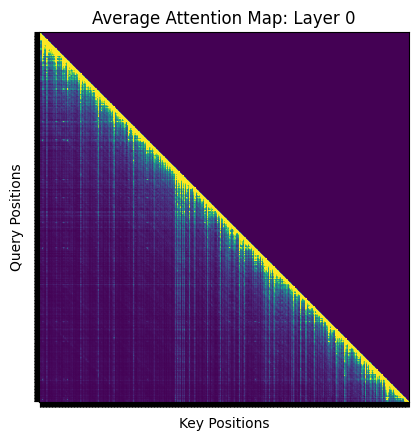

Heatmap saved to ./obs/pyramidkv/layer13.jpg


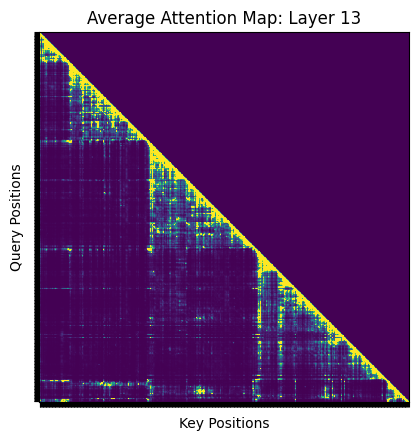

Heatmap saved to ./obs/pyramidkv/layer27.jpg


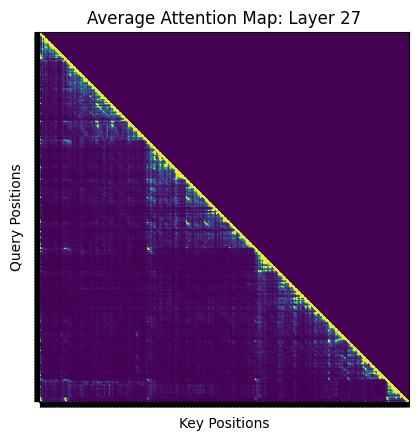

In [2]:
from pyramidkv.viztools import infer_attention, plot_attention_heatmap

if __name__ == "__main__":
    device="cuda:7"
    attentions = infer_attention(model, tokenizer, prompt, device)
    plot_attention_heatmap(attentions, layer_ids=[0, 13, 27], save_dir="pyramidkv")

# StreamingLLM